In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
# 読み込むデータセットを指定(MNIST)
mnist = tf.keras.datasets.mnist
# データセット読み込み
# x_train:訓練データ(画像)
# y_train:訓練データ(正解ラベル)
# x_test:テストデータ(画像)
# y_test:テストデータ(正解ラベル)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 画像データを正規化
x_train, x_test = x_train / 255.0, x_test / 255.0

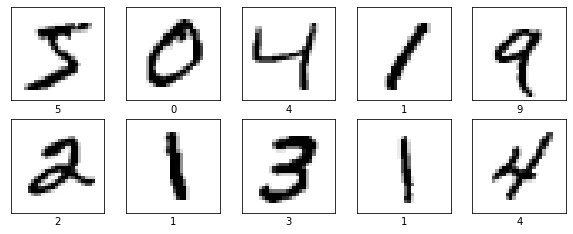

In [3]:
# 訓練データの先頭10サンプルを確認
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [4]:
# 学習、評価
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 学習
model.fit(x_train, y_train, epochs=5)
# 評価
# 約98%の正解率
model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2975 - accuracy: 0.9131
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1455 - accuracy: 0.9571
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1093 - accuracy: 0.9664
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0887 - accuracy: 0.9734
Epoch 5/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0755 - accuracy: 0.9763
10000/1 - 0s - loss: 0.0434 - accuracy: 0.9763


[0.07474706557402387, 0.9763]

In [34]:
import numpy as np
from PIL import Image
import os

image_list = [] #トレーニングimage格納用list
label_list = [] #トレーニングlabel格納用list


#train_path = "data/trainingSet"
test_path = "C:/Users/USER/Documents/git/python/TensorFlow/png"

for filename in os.listdir(test_path):
    label=os.path.splitext(filename)[0]
    label_list.append(label)
    image_path = test_path + "/" + filename
    
    #グレースケールとして画像の読み込み    
    image = np.array(Image.open(image_path).convert("RGB").resize((28,28))) #画像をグレースケールで28x28のサイズに変換
    image_list.append(image / 255.) # 255で割って正規化

#    image_list.append(img)
    
#    label=os.path.splitext(filename)[0]
#    label_list.append(label)
#    image_path = dir + "/" + filename
#    image = np.array(Image.open(image_path).convert("L").resize((28,28))) #画像をグレースケールで28x28のサイズに変換
#    image_list.append(image / 255.) # 255で割って正規化
    #image_list.append(img.flatten().astype(np.float32)/255.0) #形式を変更

In [103]:
import numpy as np
from PIL import Image
import os
import cv2

#Xt = []

#train_path = "data/trainingSet"
test_path = "C:/Users/USER/Documents/git/python/TensorFlow/number_file"
#test_path = "C:/Users/USER/Documents/git/python/TensorFlow/png"


for filename in os.listdir(test_path):
    label=os.path.splitext(filename)[0]
    label_list.append(label)
    image_path = test_path + "/" + filename
    
    X = []
    img = np.array(Image.open(image_path).convert("L").resize((28,28)))
    X.append(img)

    X = np.asarray(X)
    X = X.astype('float32')
    X = X / 255.0

    features = model.predict(X)

    print('----------')
    print(image_path)
    print(features.argmax())
    print('----------')

----------
C:/Users/USER/Documents/git/python/TensorFlow/number_file/gray_0.png
0
----------
----------
C:/Users/USER/Documents/git/python/TensorFlow/number_file/gray_1.png
1
----------
----------
C:/Users/USER/Documents/git/python/TensorFlow/number_file/gray_2.png
2
----------
----------
C:/Users/USER/Documents/git/python/TensorFlow/number_file/gray_3.png
3
----------
----------
C:/Users/USER/Documents/git/python/TensorFlow/number_file/gray_4.png
4
----------
----------
C:/Users/USER/Documents/git/python/TensorFlow/number_file/gray_5.png
5
----------
----------
C:/Users/USER/Documents/git/python/TensorFlow/number_file/gray_6.png
6
----------
----------
C:/Users/USER/Documents/git/python/TensorFlow/number_file/gray_7.png
7
----------
----------
C:/Users/USER/Documents/git/python/TensorFlow/number_file/gray_9.png
9
----------


In [7]:
image_list = np.array(image_list) # リストをnumpy配列に変換する。
y_test2 = np.array(label_list) # リストをnumpy配列に変換する。
#y_test2 = tf.keras.utils.to_categorical(label_list)

#x_test2 = image_list.reshape(28, 28)
x_test2 = image_list

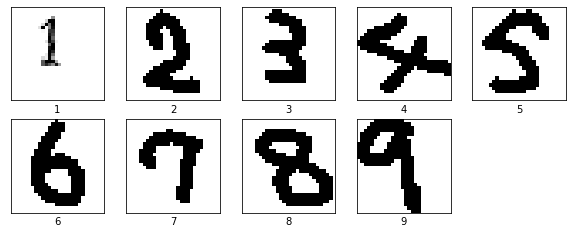

In [37]:
# 訓練データの先頭10サンプルを確認
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_list[i], cmap=plt.cm.binary)
    plt.xlabel(label_list[i])
plt.show()

In [9]:
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
#model.evaluate(x_test,  y_test, verbose=2)
result = model.predict_classes(x_test2)
print(result[1])

ValueError: Error when checking input: expected flatten_input to have 3 dimensions, but got array with shape (2, 28, 28, 3)

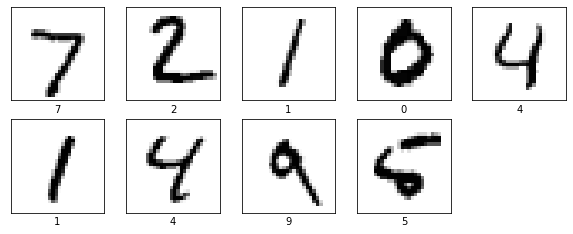

In [81]:
# 訓練データの先頭10サンプルを確認
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()

In [89]:
image = tf.image.encode_jpeg(x_test[0], format="rgb")
with open(y_test[0] + "_test.jpeg", "wb") as fb:
    fb.write(image)

InvalidArgumentError: image must be 3-dimensional[1,28,28,1] [Op:EncodeJpeg]

In [83]:
import argparse
import gzip
import pathlib
import struct

import numpy as np
import pandas as pd
import requests
from PIL import Image


def donwload(urls, path):
    path.mkdir(parents=True, exist_ok=True)
    for url in urls:
        filepath = path / pathlib.Path(url).name
        if not filepath.exists():
            res = requests.get(url)
            if res.status_code == 200:
                with open(filepath, 'wb') as f:
                    f.write(res.content)


def load(paths):
    x_path, y_path = paths
    with gzip.open(x_path) as fx, gzip.open(y_path) as fy:
        fx.read(4)
        fy.read(4)
        N, = struct.unpack('>i', fy.read(4))
        if N != struct.unpack('>i', fx.read(4))[0]:
            raise RuntimeError('wrong pair of MNIST images and labels')
        fx.read(8)

        images = np.empty((N, 784), dtype=np.uint8)
        labels = np.empty(N, dtype=np.uint8)

        for i in range(N):
            labels[i] = ord(fy.read(1))
            for j in range(784):
                images[i, j] = ord(fx.read(1))
    return images, labels


def make_images(path, images, labels):
    path.mkdir(parents=True, exist_ok=True)
    for (i, image), label in zip(enumerate(images), labels):
        filepath = path / '{}_{}.jpg'.format(label, i)
        Image.fromarray(image.reshape(28, 28)).save(filepath)


def make_labellist(path, kind, labels):
    path.mkdir(parents=True, exist_ok=True)
    filepaths = [
        '{}_{}.jpg'.format(label, i) for i, label in enumerate(labels)
    ]
    df = pd.DataFrame({'name': filepaths, 'target': labels.tolist()})
    df.to_csv(path / '{}.csv'.format(kind), index=False, header=False)


def main():
    parser = argparse.ArgumentParser(
        description='Download and Convert MNIST binary files to image files')
    parser.add_argument('-p', '--path', type=pathlib.Path, default='./data')
    parser.add_argument('-o', '--out', choices=['npz', 'jpg'], default='jpg')
    args = parser.parse_args()

    def pipeline(kind):
        _kind = kind
        if kind == 'test':
            _kind = 't10k'

        baseurl = 'http://yann.lecun.com/exdb/mnist'
        urls = [
            '{}/{}-images-idx3-ubyte.gz'.format(baseurl, _kind),
            '{}/{}-labels-idx1-ubyte.gz'.format(baseurl, _kind)
        ]
        donwload(urls, args.path / 'raw')

        paths = [
            args.path / 'raw' / '{}-images-idx3-ubyte.gz'.format(_kind),
            args.path / 'raw' / '{}-labels-idx1-ubyte.gz'.format(_kind)
        ]
        images, labels = load(paths)

        if args.out == 'jpg':
            path = args.path / 'processed'
            make_images(path / 'images' / kind, images, labels)
            make_labellist(path / 'labels', kind, labels)
        else:
            path = args.path / 'processed' / 'npz'
            path.mkdir(parents=True, exist_ok=True)
            np.savez_compressed(
                path / '{}.npz'.format(kind), x=images, y=labels)

    print('Processing train data ...')
    pipeline('train')

    print('Processing test data ...')
    pipeline('test')


if __name__ == '__main__':
    main()

usage: ipykernel_launcher.py [-h] [-p PATH] [-o {npz,jpg}]
ipykernel_launcher.py: error: unrecognized arguments: -f C:\Users\USER\AppData\Roaming\jupyter\runtime\kernel-1e5c862f-9c92-406b-a9b5-c0dba591e429.json


SystemExit: 2

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3333: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [97]:
# MNIST の画像をファイルに保存する。
import glob
import os
from PIL import Image

(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_dir = 'number_file'
os.makedirs(img_dir, exist_ok=True)
for data, label in zip(x_test[:20], y_test[:20]):
    img = Image.fromarray(data)
    # グレースケール形式で保存する。
    img.save(os.path.join(img_dir,
             'gray_{}.png'.format(label)))

    # RGB 形式で保存する。
    img = img.convert('RGB')
    img.save(os.path.join(img_dir,
             'color_{}.png'.format(label)))